In [1]:
import pandas as pd
import numpy as np
import lasio
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import scale
import seaborn as sns
import pickle
from zmapio import ZMAPGrid
import lasio
import os
import warnings
warnings.filterwarnings("ignore")
import collections

In [7]:
df_corrected=np.load("corrected_interval_depths.pkl", allow_pickle=True)
#df_corrected.head()

In [7]:
df_corrected['Well Name'].values

array(['PRICE ESTATE UNIT 1 3', 'PRICE ESTATE UNIT N 2',
       'NEAL J O `21` 2', 'W C TYRRELL UNIT `2 2', 'LAUGHLIN ANNA 2',
       'TYRRELL W C UNIT 1 4', 'PALMER 3', 'HF ANTHONY 3',
       'FORBUSH-ANTHONY 1H', 'BEEFMASTER 1H', 'EVANS N T 8',
       'SCHLOSSER FRED ESTA 2-D', 'TEXACO `33` 1', 'WOODS STATE 18 1',
       'BUECHY STATE `28` 1', 'TXL `AI` (NCT-D) 1', 'TXL `AI`(NCT-D) 3',
       'UNIVERSITY 20-5 1', 'UNIVERSITY `39-21A` 1H',
       'UNIVERSITY `40-21A` 4H', 'UNIVERSITY `40-21B` 4',
       'UNIVERSITY `39-21B` 1', 'UNIVERSITY `40-21A` 2H',
       'UNIVERSITY `40-21A` 1', 'UNIVERSITY `41-21B` 1H',
       'UNIVERSITY `37-20B` 1', 'UNIVERSITY `29-21B` 1',
       'UNIVERSITY `40-21B` 3H', 'UNIVERSITY `40-21B` 2H',
       'UNIVERSITY `10-18B` 7', 'UNIVERSITY `9-18B` 3',
       'UNIVERSITY `10-18A` 5', 'UNIVERSITY `10-18A` 4',
       'UNIVERSITY `11-18A` 4', 'UNIVERSITY `10-18A` 6H',
       'UNIVERSITY `9-18A` 1', 'UNIVERSITY `11-18A` 3',
       'T B PRUETT ETAL GAS 9', 'UNIVE

In [6]:
np.shape(df_corrected)

(127, 10)

In [17]:
directory = "/scratch/user/eliza95/Researchfiles/Berg_Hughes_project/CoRE/Wells_with_4_logs"

In [4]:
desired_format=np.array(['PEFWS', 'GRWS', 'DENWS', 'DTWS'])

In [6]:
## files that have all 4 logs ending with WS

a=[]
for top, dirs, files in  os.walk(directory): ## checking through all las files in the directory 
    for filename in files:
        
        if not filename.endswith('.LAS'):
            continue
        start=filename.find('GP') +2
        end=filename.find('.', start)
        uwi=filename[start:end]  
        
        if uwi in df_corrected.UWI.values.astype(str):
            print ('processing:', uwi)
            log=lasio.read(filename)  ## read the file
            df_log=log.df()
            col_list=np.array(df_log.columns).astype(str)
            selected_formats=np.intersect1d(col_list, desired_format)
            if len(selected_formats)==4:
                a.append(uwi)
            

processing: 30015282290000
processing: 42475364260000
processing: 30025347780000
processing: 42389322210000
processing: 42475343300000
processing: 30025318560000
processing: 42371370170000
processing: 42475347500000
processing: 30015282880000
processing: 30025424400000
processing: 42371365490000
processing: 42371371520000
processing: 42301312240000
processing: 30015371470000
processing: 30025346750000
processing: 30025330490000
processing: 42495326620000
processing: 42389320950000
processing: 30025343520000
processing: 30025301330000
processing: 42371369020000
processing: 30015285320000
processing: 30015338530000
processing: 42495326070000
processing: 30025341520000
processing: 42495326310000
processing: 3001540818000P
processing: 30015332450000
processing: 30025423540000
processing: 42475347490000
processing: 42389335570000
processing: 30015338830000
processing: 30025365100000
processing: 42495325220000
processing: 42389338090000
processing: 42475364280000
processing: 30015321800000
p

In [8]:
len(a)

65

In [9]:
np.save('wells_with_WS_alias.npy', np.array(a))

In [15]:
a=np.load('wells_with_WS_alias.npy')

In [18]:
selected_wells={}
i=-1

for top, dirs, files in  os.walk(directory): ## checking through all las files in the directory 
    for filename in files:
        i=i+1
        
        if not filename.endswith('.LAS'):
            continue
        start=filename.find('GP') +2
        end=filename.find('.', start)
        uwi=filename[start:end]  
        
        if uwi in a:
            print(i) ## means the well has all the 4 logs and is inside the basin
            print('processing well: %s'%filename)
            wc_a=df_corrected['Top_WC_A'].loc[df_corrected['UWI'].astype(str)==uwi].values
            wc_base=df_corrected['Base_WC'].loc[df_corrected['UWI'].astype(str)==uwi].values
            
            log=lasio.read(filename)  ## read the file
            df_log=log.df()
            df_depth=df_log[(df_log.index>=wc_a[0]) & (df_log.index<=wc_base[0])] ## whether any part of it is in wolfcamp
            idx=df_depth.index
            
            if idx.shape[0]==0:
                print ('No data in Wolfcamp depth')
                continue
            data=df_depth[['PEFWS', 'GRWS', 'DENWS', 'DTWS', 'DRESWS']]
            name=df_corrected['Well Name'].loc[df_corrected['UWI'].astype(str)==uwi].values
            selected_wells[name.item()]=data
            
            
    

3
processing well: GP30015282290000.LAS
No data in Wolfcamp depth
21
processing well: GP30025318560000.LAS
24
processing well: GP42475347500000.LAS
25
processing well: GP30015282880000.LAS
38
processing well: GP42301312240000.LAS
39
processing well: GP30015371470000.LAS
48
processing well: GP30025330490000.LAS
No data in Wolfcamp depth
51
processing well: GP42389320950000.LAS
No data in Wolfcamp depth
59
processing well: GP30025301330000.LAS
No data in Wolfcamp depth
61
processing well: GP30015285320000.LAS
No data in Wolfcamp depth
62
processing well: GP30015338530000.LAS
63
processing well: GP42495326070000.LAS
No data in Wolfcamp depth
70
processing well: GP42495326310000.LAS
No data in Wolfcamp depth
80
processing well: GP30015332450000.LAS
83
processing well: GP42475347490000.LAS
90
processing well: GP42495325220000.LAS
No data in Wolfcamp depth
100
processing well: GP42475364280000.LAS
103
processing well: GP42475344460000.LAS
No data in Wolfcamp depth
105
processing well: GP4237

In [21]:
f=open('stage_2_selected_wells.pkl','wb')
pickle.dump(selected_wells, f)

In [4]:
f=open('stage_2_selected_wells.pkl','rb')
sel_wells=pickle.load(f)
#sel_wells

In [5]:
keys = [] 
values = [] 
items = sel_wells.items() 
for i in items: 
    keys.append(i[0]), values.append(i[1]) 
len(keys)

31

In [6]:
df_corrected.loc[df_corrected['Well Name'].isin(keys)].iloc[:,0:4].to_csv('31_WELL_COORDS.csv')

NameError: name 'df_corrected' is not defined

In [7]:
df_corrected=pd.read_csv('31_WELL_COORDS.csv')

In [8]:
## visualizing the distribution of the 31 wells across the basin

top_map=ZMAPGrid('New-Wolfcamp_A.dat')

In [9]:
import mplcursors
%matplotlib nbagg

In [14]:
np.unique(df['Well Name'])

array(['ANASAZI `16` STATE 1', 'ANGUS 7 STATE 1', 'BEGGS 21 STATE COM 1',
       'BILBREY `32` STATE 1', 'BOUNDS 25 COM 1', 'COTTON DRAW `9L` FE 1',
       'GERONIMO 28 STATE C 1', 'GURNEY 3 STATE 1', 'KF STATE COM 2',
       'LANCASTER SPRING UN 3', 'MADERA 24 FEDERAL 1',
       'MERCHANT 8 FEDERAL 1', 'MILLARD DECK ESTATE 1',
       'MURCHINSON `2` STAT 1', 'PALOMA 30 FEDERAL 2',
       'PLU BIG SINKS 11 FE 1H PILOT', 'PLU ROSS RANCH 19 F 1H PILOT',
       'PRICE ESTATE UNIT 1 3', 'REEVES `BG` FEE 2',
       'SCHLOSSER FRED ESTA 2-D', 'TYRRELL W C UNIT 1 4',
       'UNIVERSITY 10-18 `A 7', 'UNIVERSITY 11-18 `A 5',
       'UNIVERSITY 16-18 `A 1', 'UNIVERSITY 16-18 `B 1',
       'UNIVERSITY 17-18 1H', 'UNIVERSITY 20-16 1', 'UNIVERSITY 20-5 1',
       'UNIVERSITY 23-18 `B 2', 'WHITE CITY PENN 29 4',
       'WHITE CITY UNIT COM 2'], dtype=object)

<IPython.core.display.Javascript object>


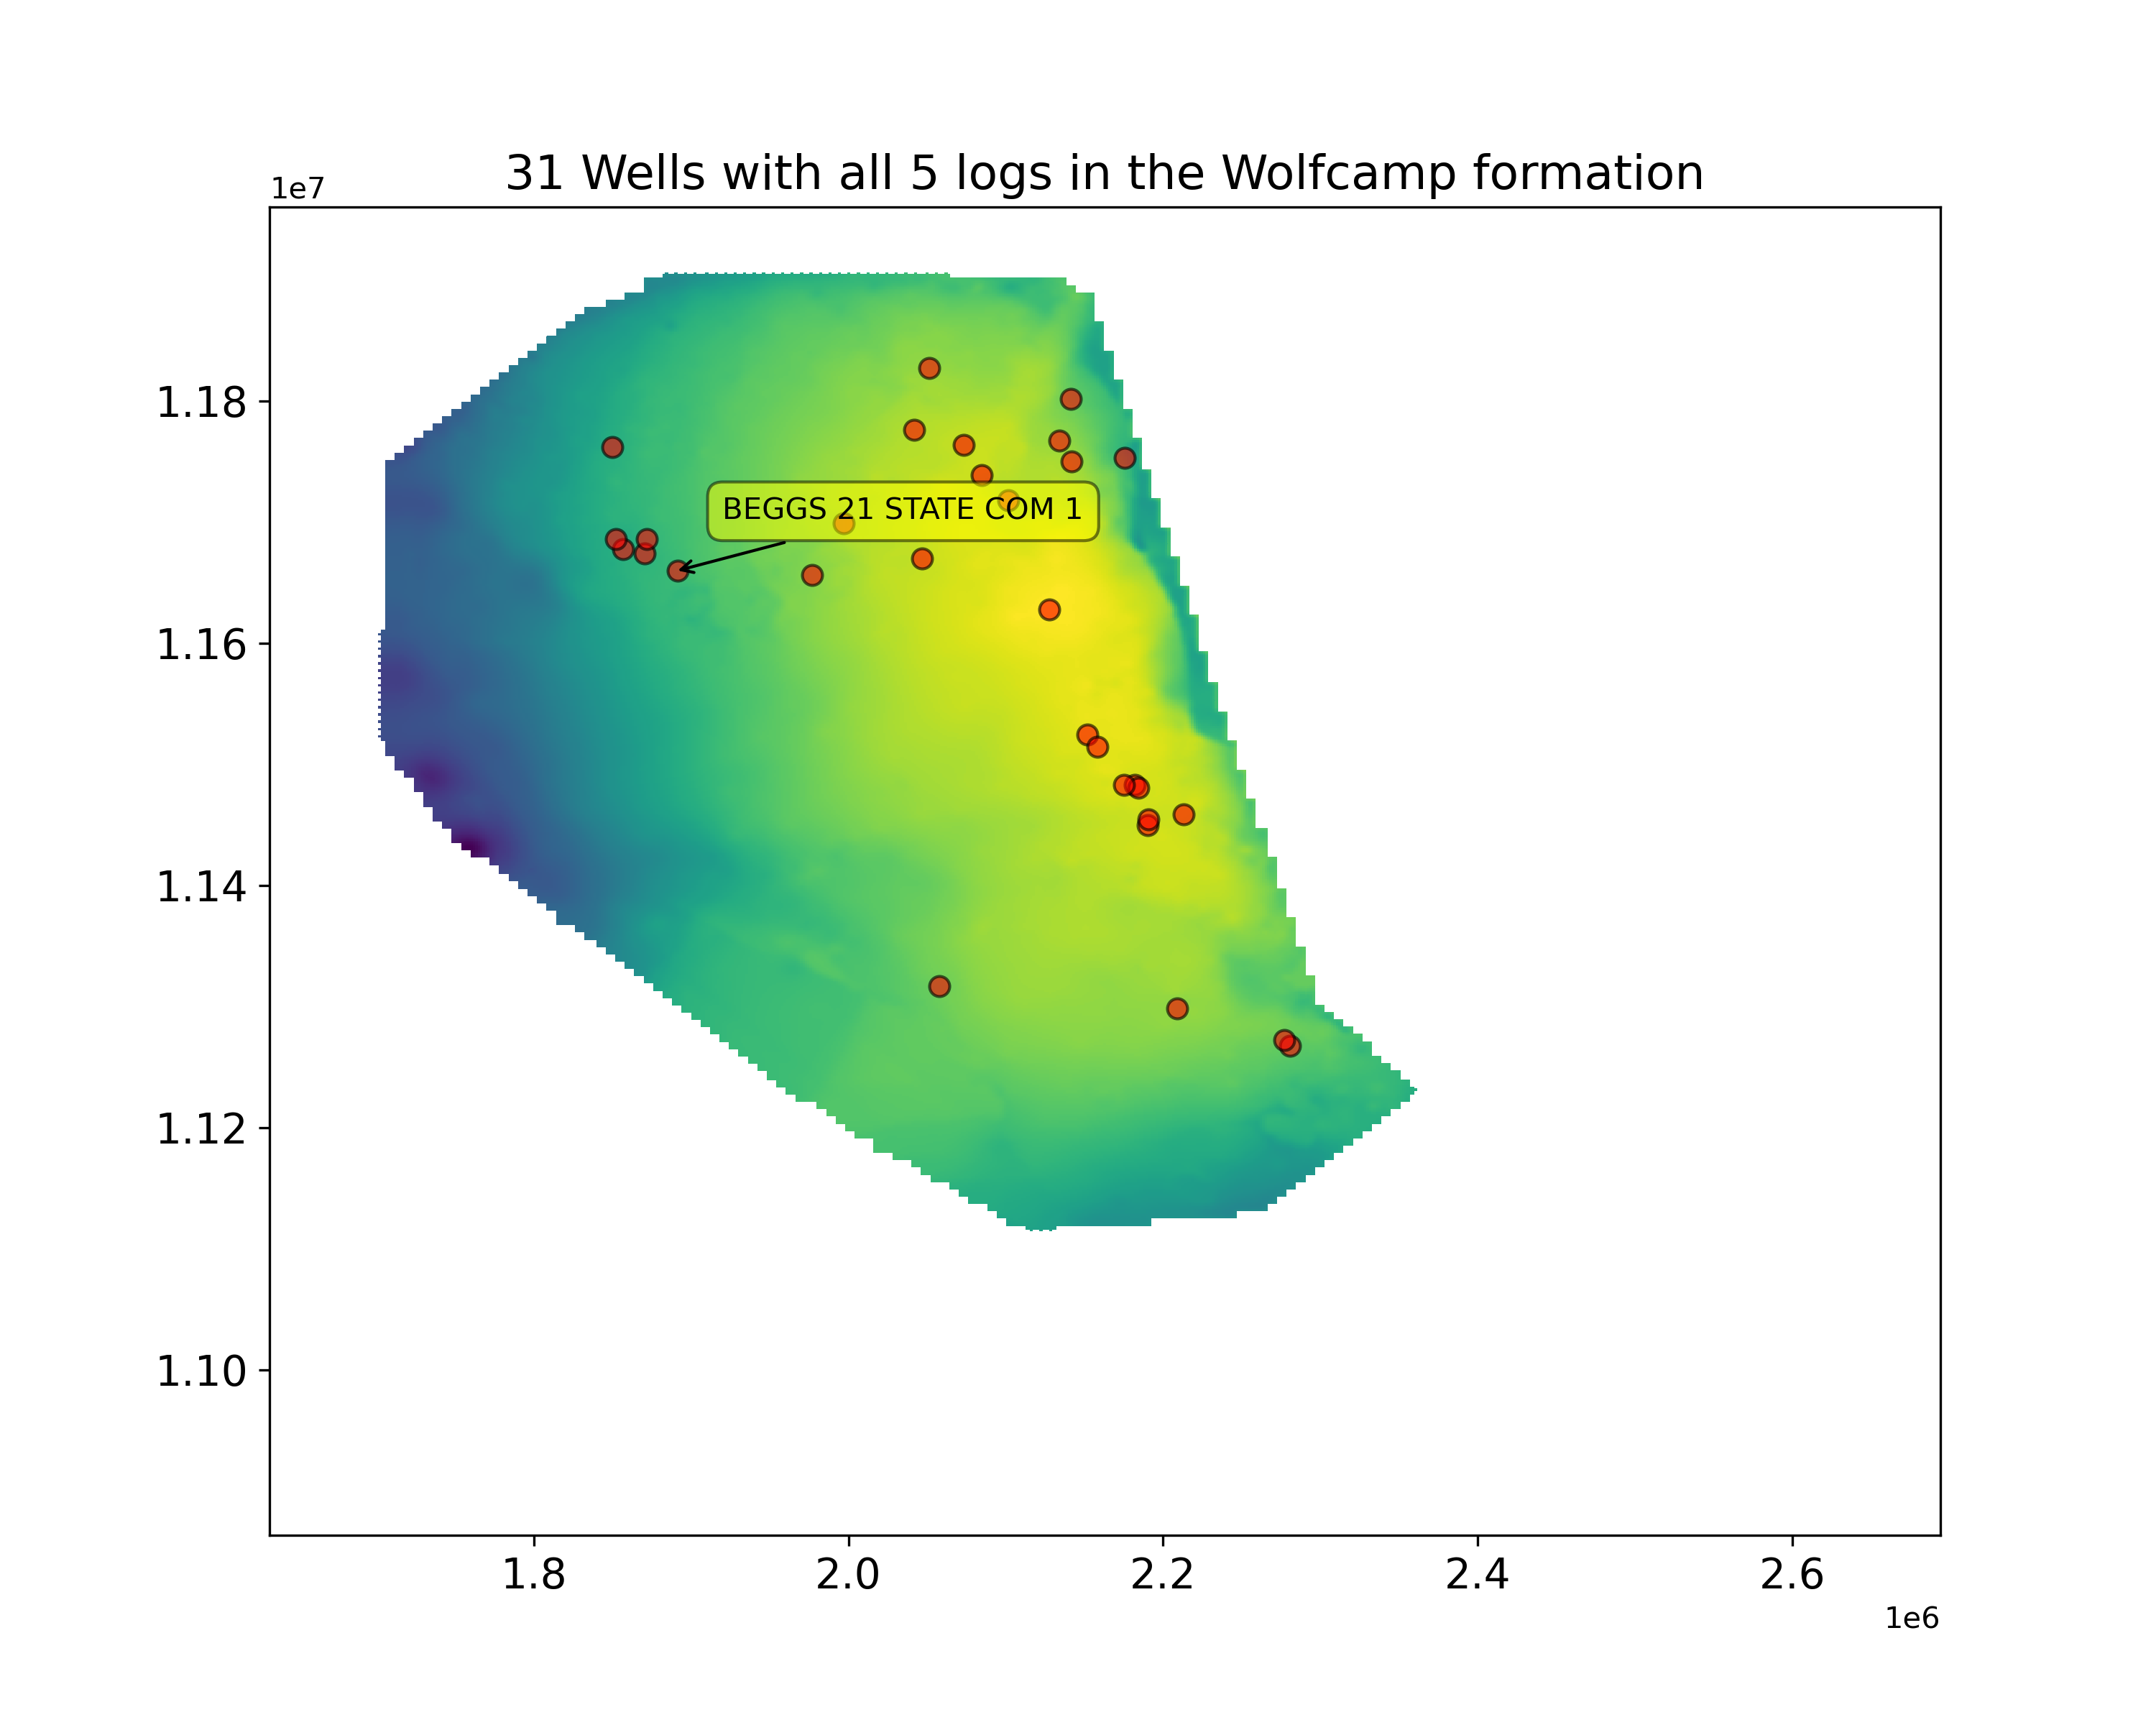

In [25]:
fig, ax = plt.subplots(figsize = (10,8))
top_map.plot()
df=df_corrected.loc[df_corrected['Well Name'].isin(keys)]
ax.scatter(df['Surf X'], df['Surf Y'], zorder=1, 
           alpha= 0.6, c='r', s=45, edgecolor='black')
ax.set_title('31 Wells with all 5 logs in the Wolfcamp formation', fontsize=16)
labels=df['Well Name'].values
mplcursors.cursor(ax, hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(labels[sel.target.index]))
plt.tick_params(labelsize=14)
plt.show()

In [31]:
## total no of samples

i=0
for x in values:
    i=i+len(x)
print(i)

104615


In [9]:
print(keys)

['ANASAZI `16` STATE 1', 'UNIVERSITY 10-18 `A 7', 'MURCHINSON `2` STAT 1', 'UNIVERSITY 20-16 1', 'PLU BIG SINKS 11 FE 1H PILOT', 'BOUNDS 25 COM 1', 'WHITE CITY PENN 29 4', 'UNIVERSITY 11-18 `A 5', 'UNIVERSITY 16-18 `B 1', 'TYRRELL W C UNIT 1 4', 'GERONIMO 28 STATE C 1', 'GURNEY 3 STATE 1', 'COTTON DRAW `9L` FE 1', 'BEGGS 21 STATE COM 1', 'MADERA 24 FEDERAL 1', 'UNIVERSITY 23-18 `B 2', 'MILLARD DECK ESTATE 1', 'UNIVERSITY 20-5 1', 'SCHLOSSER FRED ESTA 2-D', 'BILBREY `32` STATE 1', 'LANCASTER SPRING UN 3', 'PALOMA 30 FEDERAL 2', 'UNIVERSITY 17-18 1H', 'ANGUS 7 STATE 1', 'MERCHANT 8 FEDERAL 1', 'UNIVERSITY 16-18 `A 1', 'REEVES `BG` FEE 2', 'PLU ROSS RANCH 19 F 1H PILOT', 'PRICE ESTATE UNIT 1 3', 'KF STATE COM 2', 'WHITE CITY UNIT COM 2']
